Code of Academic Integrity
* I affirm that
* This work is my own original work and is not a borrowed work,

*   This work is my own original work and is not a borrowed work, either from other students or from assignments for other courses.

*   I have not given or received any unauthorized help on this assignment.

*   This submission is free from Plagiarism, Fabrication of facts, Unauthorized assistance, collusion

*   This submission gives proper credit to sources and references, acknowledges the contributions and ideas of others relevant to this academic work.

*   This submission was prepared by me fully adhering to the rules that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in any other behavior that subverts the purpose of the assignment and the directions of the teacher.

# IPS - 7

## Decision_Tree_and_Random_Forest with Data Argumentation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/Shush25/myDatasets/main/Churn.csv")

In [ ]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Data Pre-Processing

Converting categorical to numerical. Label encoding give one numerical value for each category.

In [ ]:
# Label Encoder is used for mapping categorical data into 1, 2, 3, 4, 5, 6...
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [ ]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### Correlation

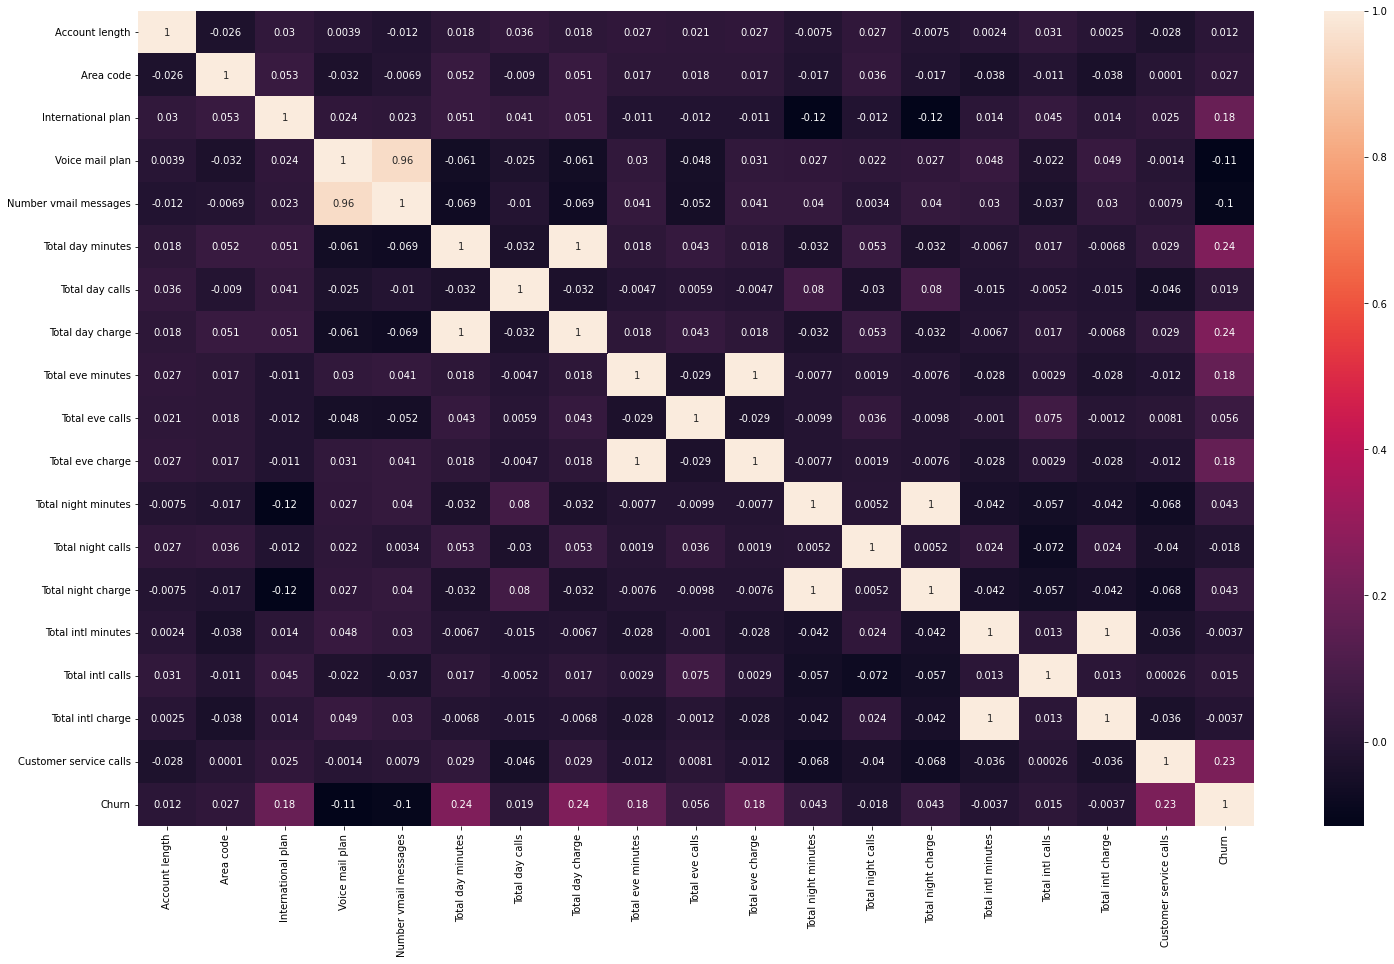

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)

Observations from Heat Map

* Voice mail plan vs Number of vmail messages - 0.96 - Churn vs Voice mail plan -  -0.11 and Churn Vs Number of vmail messages -  -0.1 so drop Number vmail messages
* total day charge vs total day minutes - 1 - Churn vs both - 0.24 - tie - drop Total day charge
* total eve minutes vs total eve charge - 1 - Churn vs both - 0.18 - drop - Total eve charge
* total night minutes vs total night charge - 1 - Churn vs both -  0.43 - drop - Total night charge
* Total intl charge vs Total intl minutes - 1 - Churn vs both -  -0.0037 - drop -Total intl charge


In [ ]:
churn_df.columns 

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


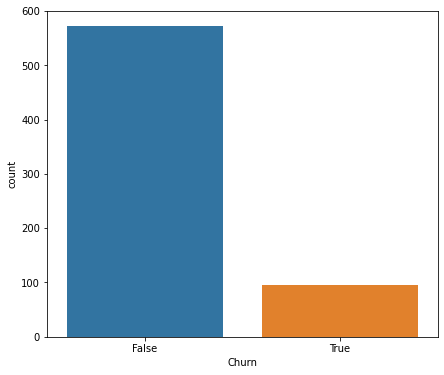

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot('Churn', data = churn_df)

In [ ]:
churn_df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

### Data Augumentation

#### Bootstrap Method

The process for upsampling or downsampling can be summarized as follows


*   Choose the size of the sample.
*   While the size of the samples is less than the chosen size
*   Randomly select an observation from the dataset and add it to the sample



In [ ]:
# resample uses "bootstrapping" method to regenrate samples by randomly selecting data for each class
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True] 

In [ ]:
df_1.shape

(95, 20)

In [ ]:
# Apply Resample
df_1_upsample = resample(df_1, n_samples = 288, replace = True, random_state = 123)

In [ ]:
df_1_upsample.shape

(288, 20)

In [ ]:
d = df_1_upsample.drop_duplicates()

In [ ]:
d.shape

(90, 20)

In [ ]:
churn_df1 = pd.concat([df_0, df_1_upsample])

In [ ]:
churn_df1.shape

(860, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


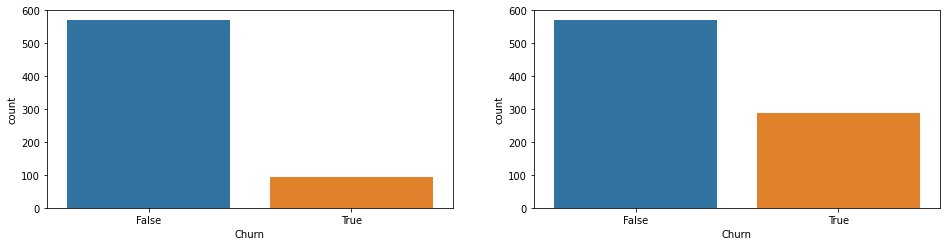

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot('Churn', data = churn_df)

plt.subplot(2,2,2)
sns.countplot('Churn', data = churn_df1)
plt.show()

**Synthetic Minority Oversampling Technique (SMOTE)**

New examples can be synthesized from the existing examples

SMOTE works by 

1.   Selecting examples that are close in the feature space
2.   Drawing a line between the examples in the feature space and drawing a new sample at a point along that line

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). 

A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

**Features**

In [ ]:
X = churn_df1.drop(['State', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn'], axis = 1)

In [ ]:
Y = churn_df1['Churn']

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 3)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
X_Full = np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [ ]:
X_Full.shape

(894, 14)

In [ ]:
S_df = pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,'Churn'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


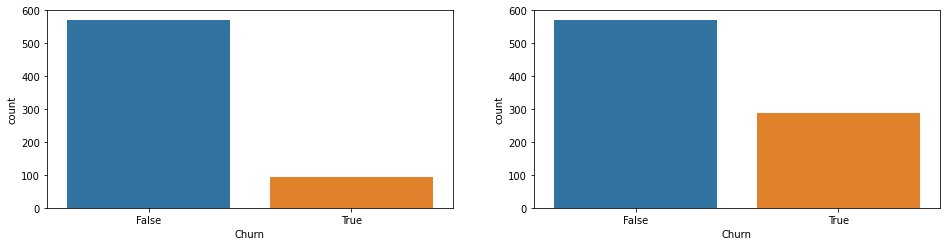

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


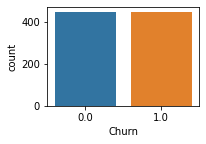

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot('Churn', data = churn_df)

plt.subplot(2,2,2)
sns.countplot('Churn', data = churn_df1)
plt.show()

plt.subplot(2,2,3)
sns.countplot('Churn', data = S_df)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# maximum depth of decision trees is 9
clf_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)


In [ ]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [ ]:
clf_tree.score(X_test, Y_test) 

0.8895348837209303

In [ ]:
clf_tree.score(X_train, Y_train) 

0.9798657718120806

#### Ploting the decision tree

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

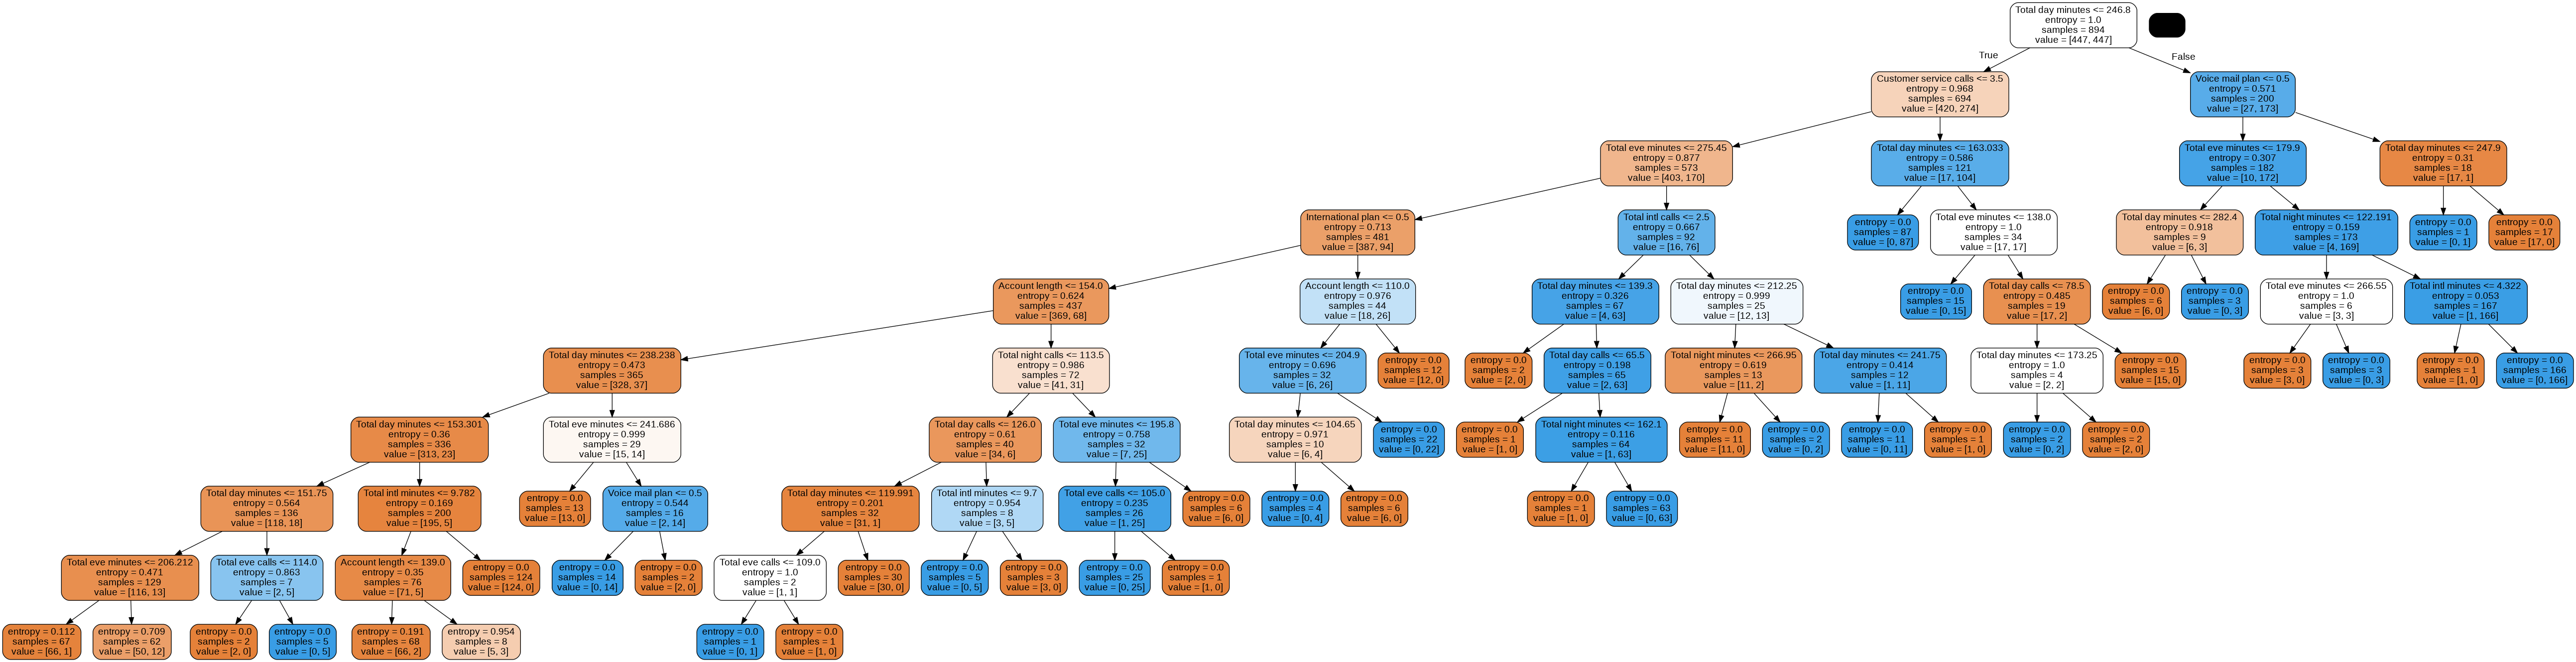

In [ ]:
Image(graph.create_png()) 

In [ ]:
Y_Pred = clf_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Y_Pred, Y_test)

In [ ]:
print(report)

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       112
        True       0.94      0.73      0.82        60

    accuracy                           0.89       172
   macro avg       0.90      0.85      0.87       172
weighted avg       0.89      0.89      0.89       172



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_train.shape

(894, 13)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE MODEL:  0.9651162790697675


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(y_pred, Y_test)

In [ ]:
print(report)

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       121
        True       0.98      0.90      0.94        51

    accuracy                           0.97       172
   macro avg       0.97      0.95      0.96       172
weighted avg       0.97      0.97      0.96       172



In [ ]:
clf_tree.score(X_test, Y_test)

0.8895348837209303

In [ ]:
clf_tree.score(X_train, Y_train)

0.9798657718120806

## Logistic_Regression_Titanic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Shush25/myDatasets/main/titanic.csv", sep = ',')

In [ ]:
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Count of Missing Values
titanic_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling Missing Values**
* Age - Column cannot be dropped and dropna cannot be used as 177 instances will be removed if so. Therefore better to replace by median
* Cabin - Column shall be dropped - cabin number available only for class 1
* Embarked -dropna may be used

In [ ]:
titanic_df.shape

(891, 12)

**Visualizing**

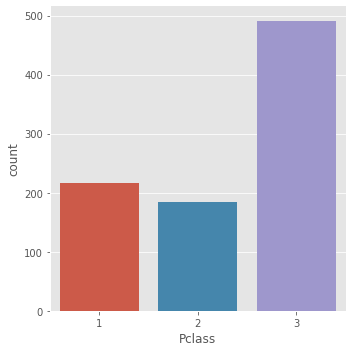

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Pclass', kind = 'count', data = titanic_df)

In [ ]:
# can get exact count using value_counts function
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

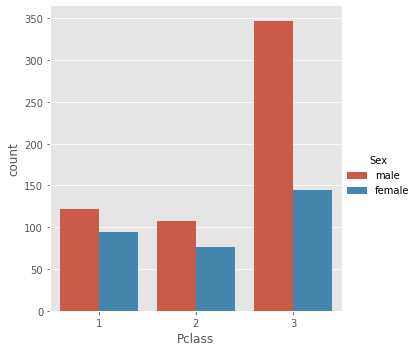

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Pclass', kind = 'count', hue = 'Sex', data = titanic_df)

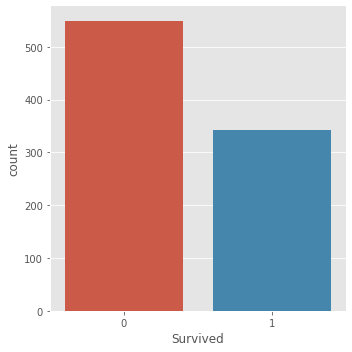

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Survived', kind = 'count', data = titanic_df)

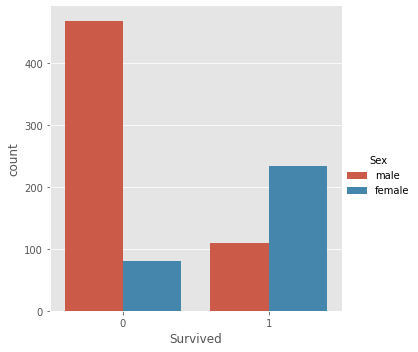

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Survived', kind = 'count', hue = 'Sex', data = titanic_df)

Handling Missing Values
* Replacing the missing values with mean or median. Replace by mean of samples if it is a continuous data, replace by median of samples if it is a discrete data.

In [ ]:
titanic_df['Age'].median()

28.0

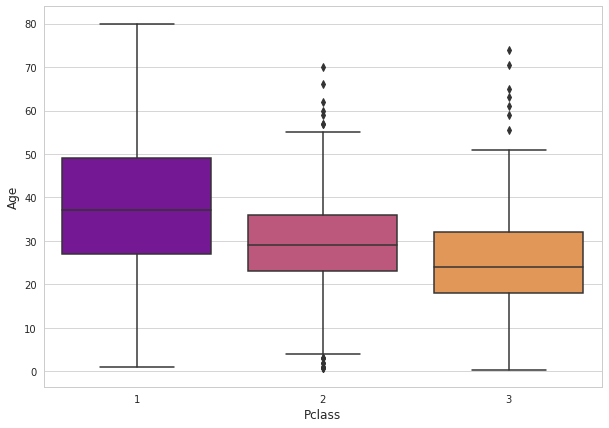

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = "Age", data = titanic_df, palette = 'plasma')

In [ ]:
median_class1 = titanic_df[titanic_df['Pclass']==1]['Age'].median()
median_class1

37.0

In [ ]:
median_class2 = titanic_df[titanic_df['Pclass']==2]['Age'].median()
median_class2

29.0

In [ ]:
median_class3 = titanic_df[titanic_df['Pclass'] == 3]['Age'].median()
median_class3

24.0

Simple Imputer
* Replacing missing values of Age with meadian of each class of passengers.

In [ ]:
def imputer_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return median_class1
        elif Pclass == 2:
            return median_class2
        else:
            return median_class3
    else:
        return Age

In [ ]:
# .apply(function name) => modify or apply changes in DataFrames
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(imputer_age, axis = 1)

In [ ]:
titanic_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**A cabin is not applicable for all category of passengers, we shall drop it**

In [ ]:
titanic_df.drop('Cabin', axis = 1, inplace=True)

In [ ]:
# dropna() - drops entire row having any single missing values with NaN
titanic_df.dropna(inplace=True)

Convert all data to numerical form - perform one hot encoding to convert categorical to numerical.
* When there are only two categories we shall keep one encoding and discard the other as the values convey the meaning.  

In [ ]:
# One Hot Encoding
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
sex 

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embarked = pd.get_dummies(titanic_df['Embarked'])

In [ ]:
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
# pd.concat() : concat various dataframes 
titanic_df2 = pd.concat([titanic_df, sex, embarked], axis = 1)

In [ ]:
titanic_df2.drop(['Name','Ticket','Sex','Embarked'], axis = 1, inplace=True)

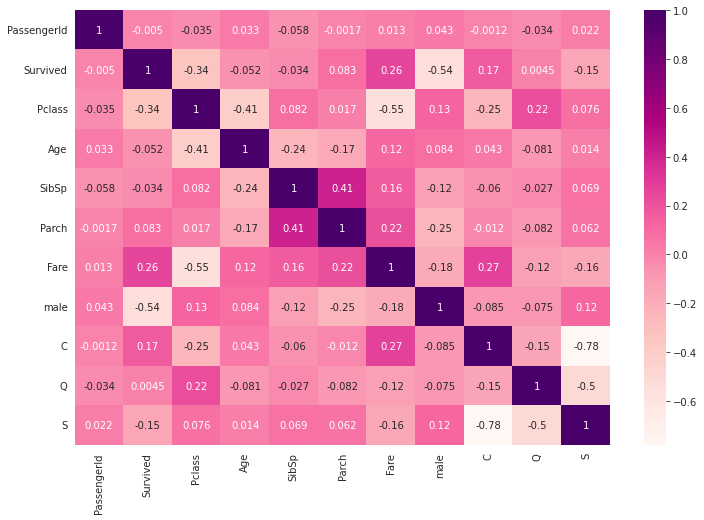

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df2.corr(), annot = True, cmap ='RdPu')
plt.show()

**PassengerID is having very weak correlation**

Features

In [ ]:
X = titanic_df2.drop(['PassengerId', 'Survived'], axis = 1)

In [ ]:
Y = titanic_df2['Survived']

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,1
888,3,24.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(C = 10, max_iter=100, solver='liblinear', tol=0.001,random_state=0)

**Do the following and check the performance of the classifier**

In [ ]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear', tol=0.001)

In [ ]:
# Accuracy
logit_model.score(X_test, Y_test)

0.8651685393258427

Classification Metrics

In [ ]:
predictions = logit_model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0])

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('confusion.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, predictions)

array([[108,  11],
       [ 13,  46]])

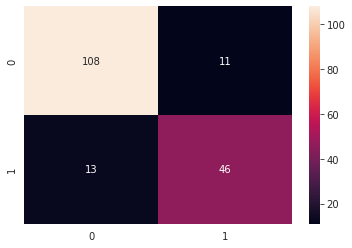

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt='0.0f')

**Useful Metrics**
* Precision is the ratio of the correctly +ve labeled by our program to all +ve labeled. 
Precision = TP/(TP+FP)
* Recall (aka Sensitivity) - ratio of the correctly +ve labeled by our program to all who are positive in reality.
Recall = TP/(TP+FN)
* Specificity is the correctly -ve labeled by the program to all who are negative.
Specificity = TN/(TN+FP)
* F1-score (aka F-Score / F-Measure) -  harmonic mean(average) of the precision and recall
best if there is some sort of balance between precision (p) & recall (r) in the system. 
F1 Score isn’t so high if one measure is improved at the expense of the other. 
For example, if P is 1 & R is 0, F1 score is 0.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       119
           1       0.81      0.78      0.79        59

    accuracy                           0.87       178
   macro avg       0.85      0.84      0.85       178
weighted avg       0.86      0.87      0.86       178

